# Loading the Unsplash Research dataset in Pandas dataframes

This notebooks is an example of how to load the Unsplash Research dataset in Pandas dataframes for analysis.


## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
pd.options.display.max_columns = 26
pd.options.display.max_rows = 40

In [3]:
%run plt_style.py

## Loading the datasets in Pandas

Make sure that you correctly point to the correct path.

In [4]:
path = '../data/unsplash-dataset/'
documents = ['photos']
datasets = {}

for doc in documents:
    files = glob.glob(path + doc + ".tsv*")

    subsets = []
    for filename in files:
        df = pd.read_csv(filename, sep='\t', header=0)
        subsets.append(df)

    datasets[doc] = pd.concat(subsets, axis=0, ignore_index=True)

## Exploring the datasets

Here are the first couple of rows from each dataset, as an example.

Enjoy the exploration!

In [5]:
datasets['photos'].head()

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photographer_username,photographer_first_name,photographer_last_name,exif_camera_make,exif_camera_model,exif_iso,exif_aperture_value,exif_focal_length,exif_exposure_time,photo_location_name,photo_location_latitude,photo_location_longitude,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence
0,8ZgJyLGbC7Y,https://unsplash.com/photos/8ZgJyLGbC7Y,https://images.unsplash.com/40/KJyFV5SZSweiYGh...,2014-07-05 13:43:36,t,martindorsch,Martin,Dörsch,SONY,SLT-A77V,100.0,8.0,28.0,1/640,"Weigersdorf 29, 4551 Weigersdorf, Austria, Wei...",48.043625,14.066983,Austria,Weigersdorf,8278047,52989,narrow road in between soil grounds,NaN,NaN,NaN,NaN
1,-_rYK0egLWE,https://unsplash.com/photos/-_rYK0egLWE,https://images.unsplash.com/31/xDtuvK3GRJGUSUH...,2014-03-18 16:35:04,t,oliviahenry,Olivia,Henry,Canon,Canon EOS 1100D,250.0,5.6,55.0,1/800,NaN,NaN,NaN,NaN,NaN,5123860,42464,sea waves splashing through stone,NaN,NaN,NaN,NaN
2,PewUcrT1yIw,https://unsplash.com/photos/PewUcrT1yIw,https://images.unsplash.com/photo-141535311598...,2014-11-07 09:44:28,t,freephotosbydawn,Dawn,Emerick,Canon,Canon EOS REBEL T3i,400.0,8.0,18.0,0.3,NaN,NaN,NaN,NaN,NaN,1571552,7214,tall palm trees near sea with docks taken unde...,NaN,NaN,NaN,NaN
3,kFxWDfj0pD8,https://unsplash.com/photos/kFxWDfj0pD8,https://images.unsplash.com/photo-142224671965...,2015-01-26 04:20:40,t,alexjones,Alex,Jones,Canon,Canon EOS REBEL T3,1600.0,1.8,50.0,1/500,NaN,NaN,NaN,NaN,NaN,2843128,12718,stack of firewoods,NaN,NaN,NaN,NaN
4,r3ZWnitp3zk,https://unsplash.com/photos/r3ZWnitp3zk,https://images.unsplash.com/photo-141582700792...,2014-11-12 21:17:08,t,envisual,Charlie,Hang,NIKON CORPORATION,NIKON D3200,100.0,5.6,55.0,1/100,NaN,NaN,NaN,NaN,NaN,961314,3119,brown rock formation on body of water,NaN,NaN,NaN,NaN


# Exploratory analysis
   

## Photos

In [6]:
datasets['photos'].columns

Index(['photo_id', 'photo_url', 'photo_image_url', 'photo_submitted_at',
       'photo_featured', 'photographer_username', 'photographer_first_name',
       'photographer_last_name', 'exif_camera_make', 'exif_camera_model',
       'exif_iso', 'exif_aperture_value', 'exif_focal_length',
       'exif_exposure_time', 'photo_location_name', 'photo_location_latitude',
       'photo_location_longitude', 'photo_location_country',
       'photo_location_city', 'stats_views', 'stats_downloads',
       'ai_description', 'ai_primary_landmark_name',
       'ai_primary_landmark_latitude', 'ai_primary_landmark_longitude',
       'ai_primary_landmark_confidence'],
      dtype='object')

## Null values

In [7]:
datasets['photos'].isna().sum()

photo_id                              0
photo_url                             0
photo_image_url                       0
photo_submitted_at                    0
photo_featured                        0
photographer_username                 0
photographer_first_name               0
photographer_last_name             1656
exif_camera_make                   2830
exif_camera_model                  2874
exif_iso                           3215
exif_aperture_value                3616
exif_focal_length                  3517
exif_exposure_time                 3238
photo_location_name               15522
photo_location_latitude           18105
photo_location_longitude          18108
photo_location_country            16437
photo_location_city               19016
stats_views                           0
stats_downloads                       0
ai_description                     1393
ai_primary_landmark_name          25000
ai_primary_landmark_latitude      25000
ai_primary_landmark_longitude     25000


## Data Cleaning

In [8]:
def clean_exposures(photos,c):
    '''
    Exposure values contain 's' and 'second' in some long exposure captures and spaces as well
    '''
    filtered = photos.exif_exposure_time.str.contains(c)
    # Find indices and locate them 
    idx = photos['exif_exposure_time'].iloc[photos.loc[filtered==True].index].index
    for i in idx:
        a = photos['exif_exposure_time'].iloc[i].split(c)[0].replace("Second","").replace(" ", "")
        print("Raw: " + photos['exif_exposure_time'].iloc[i])
        photos['exif_exposure_time'].iloc[i] = a
        print(photos['exif_exposure_time'].iloc[i])
        print(" ")
        
def clean_focal(photos,c):
    '''
    There are values containing mm, - and ~ and spaces as well
    '''    
    filtered = photos.exif_focal_length.str.contains(c)
    # Find indices and locate them 
    idx = photos['exif_focal_length'].iloc[photos.loc[filtered==True].index].index
    delimiters = c.split('|')
    for i in idx:
        print("Raw: " + photos['exif_focal_length'].iloc[i])
        a = photos['exif_focal_length'].iloc[i].replace(" ","").replace(delimiters[0],".0")
        if delimiters[1] in a:
            photos['exif_focal_length'].iloc[i] = np.NaN
            print(a + '->NaN')
        elif delimiters[2] in a:
            photos['exif_focal_length'].iloc[i] = np.NaN
            print(a + '_>NaN')
        else:
            photos['exif_focal_length'].iloc[i] = a

        print(photos['exif_focal_length'].iloc[i])

    flt = np.where(photos.exif_focal_length.str.contains('\.'),True,False)
    idx = photos['exif_focal_length'].iloc[photos.loc[flt==False].index].index
    photos['exif_focal_length'].iloc[idx]+='.0'
        
def clean_iso(photos):
    '''
    Find indices that have ISO 0.0 and convert to NaN
    '''    
    idx = photos['exif_iso'].loc[photos['exif_iso']==0.0].index
    for i in idx:        
        photos['exif_iso'].iloc[i] = np.NaN

def clean_apertures(photos,c):
    '''
    Aperture values are tricky, there are inf, Inf, undef along with f/, f
    Those values have to be replaced with NaN before deal integer like string values
    We have to drop them first, as the complementary .0 will not work with NaNs
    '''    
    filtered = photos.exif_aperture_value.str.contains(c)

    idx = photos['exif_aperture_value'].iloc[photos.loc[filtered==True].index].index
    delimiters = c.split('|')
    for i in idx:
        print("Raw: " + photos['exif_aperture_value'].iloc[i])
        a = photos['exif_aperture_value'].iloc[i]
        if 'inf' in a:
            photos['exif_aperture_value'].iloc[i] = np.NaN
        elif 'Inf' in a:
            photos['exif_aperture_value'].iloc[i] = np.NaN
        elif 'undef' in a:
            photos['exif_aperture_value'].iloc[i] = np.NaN
        else:
            photos['exif_aperture_value'].iloc[i] = a.replace(delimiters[0],".").replace(delimiters[1],"").replace(delimiters[5],"")


    flt = np.where(photos.exif_aperture_value.str.contains('\.'),True,False)
    idx = photos['exif_aperture_value'].iloc[photos.loc[flt==False].index].index
    photos['exif_aperture_value'].iloc[idx]+='.0'

## Isolate the usefull features

In [9]:
df = datasets.copy()
photos = df['photos'].loc[:,['photo_id','exif_camera_make','exif_camera_model','exif_iso','exif_focal_length','exif_aperture_value','exif_exposure_time']]

In [10]:
clean_iso(photos)

In [11]:
clean_focal(photos,'mm|-|~')

Raw: 91 mm
91.0
Raw: 35mm
35.0
Raw: 85mm
85.0
Raw: 50mm
50.0
Raw: 200mm
200.0
Raw: 24mm
24.0
Raw: 60mm
60.0
Raw: 75-300
75-300->NaN
nan
Raw: 70-300
70-300->NaN
nan
Raw: 21mm
21.0
Raw: 18-105
18-105->NaN
nan
Raw: 35mm
35.0
Raw: 58mm
58.0
Raw: 18-55mm
18-55.0->NaN
nan
Raw: 74mm
74.0
Raw: 16mm
16.0
Raw: 42mm
42.0
Raw: 18mm
18.0
Raw: 14mm
14.0
Raw: 50 mm
50.0
Raw: 50 mm
50.0
Raw: 135mm
135.0
Raw: 35mm
35.0
Raw: 70-200
70-200->NaN
nan
Raw: 85mm
85.0
Raw: 35 mm
35.0
Raw: 50mm
50.0
Raw: 4.0 ~ 28mm
4.0~28.0_>NaN
nan
Raw: 50mm
50.0
Raw: 46mm
46.0
Raw: 200 mm
200.0
Raw: 50mm
50.0
Raw: 200mm
200.0
Raw: 50mm
50.0
Raw: 14mm
14.0
Raw: 85mm
85.0
Raw: 135mm
135.0
Raw: 18mm
18.0
Raw: 18-50
18-50->NaN
nan


In [12]:
clean_exposures(photos,'s')

Raw: 15s
15
 
Raw: 30s
30
 
Raw: 15s
15
 
Raw: 13s
13
 
Raw: 15s
15
 
Raw: 10s
10
 
Raw: 180s
180
 
Raw: 1 / 200s
1/200
 
Raw: 180s
180
 
Raw: 120s
120
 
Raw: 1/100s
1/100
 
Raw: 1/60s
1/60
 
Raw: 4s
4
 
Raw: 30s
30
 
Raw: 1/80s
1/80
 
Raw: 1/400s
1/400
 
Raw: 1/120s
1/120
 
Raw: 13s
13
 
Raw: 30s
30
 
Raw: 63 Seconds
63
 
Raw: 300s
300
 
Raw: 1/200s
1/200
 


In [13]:
clean_apertures(photos,',|f/|undef|inf|Inf|f')

Raw: inf
Raw: Inf
Raw: undef
Raw: undef
Raw: f/2.8
Raw: inf
Raw: 5,6
Raw: undef
Raw: undef
Raw: undef
Raw: 4,5
Raw: 5,6
Raw: 7,5
Raw: 7,5
Raw: undef
Raw: undef
Raw: f/5
Raw: f/5
Raw: f4.0
Raw: Inf
Raw: undef
Raw: undef
Raw: f/8
Raw: f4
Raw: f14
Raw: undef
Raw: 9,0
Raw: inf
Raw: inf
Raw: inf
Raw: undef
Raw: inf
Raw: inf
Raw: inf
Raw: f/5.6
Raw: 5,6
Raw: Inf
Raw: 1,8


In [13]:
from glob import glob
from PIL import Image
from collections import Counter

In [14]:
# Export cleansed photo table
photos.to_csv('../data/dataset.csv')

In [ ]:
%run orientation.py

In [14]:
photos = pd.read_csv('../data/dataset.csv')

In [15]:
photos.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

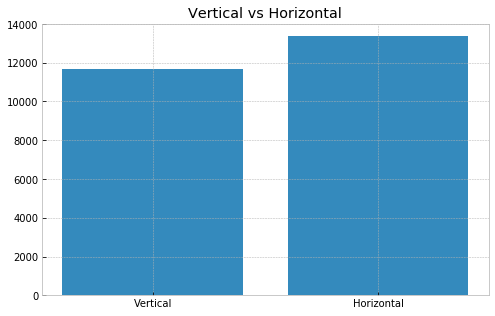

In [51]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
plt.xticks([0,1],['Vertical','Horizontal'])
plt.title("Vertical vs Horizontal")
plt.bar(dict(Counter(photos['orientation'])).keys(), dict(Counter(photos['orientation'])).values())

plt.savefig('orientation.png')

#### We have assigned NaN values to focal length, iso and aperture features.


## Drop NANs and empty values

In [17]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1.0
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1.0
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1.0
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1.0
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1.0
...,...,...,...,...,...,...,...,...
24995,mle1P_kq9mw,NaN,NaN,NaN,NaN,NaN,NaN,1.0
24996,lPqq7oriWnw,Canon,Canon EOS R,640.0,105.0,4.0,1/100,1.0
24997,8M3ekCRYwoA,Canon,Canon EOS Rebel SL2,100.0,75.0,4.0,1/250,0.0
24998,BnClgTh2kMU,SONY,ILCE-6000,100.0,18.0,16.0,1/100,0.0


In [18]:
dataset = photos.dropna(axis=0,inplace=False,subset=['exif_iso','exif_focal_length','exif_exposure_time','exif_aperture_value','orientation'])

In [19]:
dataset.shape

(21168, 8)

In [20]:
dataset.isna().sum()

photo_id                0
exif_camera_make       64
exif_camera_model      84
exif_iso                0
exif_focal_length       0
exif_aperture_value     0
exif_exposure_time      0
orientation             0
dtype: int64

## Construct the dataset (train-valid-test) 
The idea is to split the 21168 free of NaN exif value photos in training and validation sets 

The rest with NaN values is the test set

## Create labels

For the #1 milestone we can think of a binary classifier of bokeh/not bokeh,

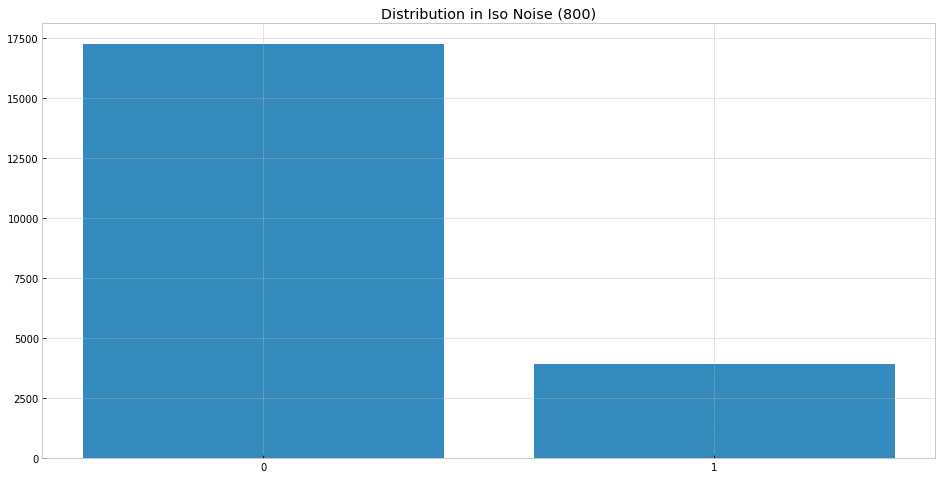

In [52]:
## Assign 800 as threshold
iso_noise_labels = np.where(dataset['exif_iso']>=800,'1','0')

plt.title("Distribution in Iso Noise (800)")
plt.bar(dict(Counter(iso_noise_labels)).keys(), dict(Counter(iso_noise_labels)).values())
plt.savefig('iso.png')

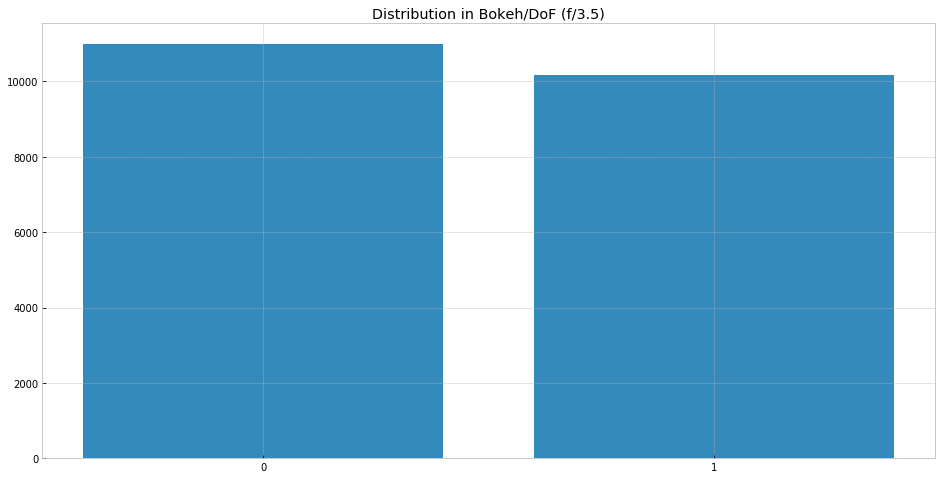

In [53]:
## Assign 3.5 as threshold
bokeh_labels = np.where(dataset['exif_aperture_value']<=3.5,'1','0')

plt.title("Distribution in Bokeh/DoF (f/3.5)")
plt.bar(dict(Counter(bokeh_labels)).keys(), dict(Counter(bokeh_labels)).values())
plt.savefig('aperture.png')

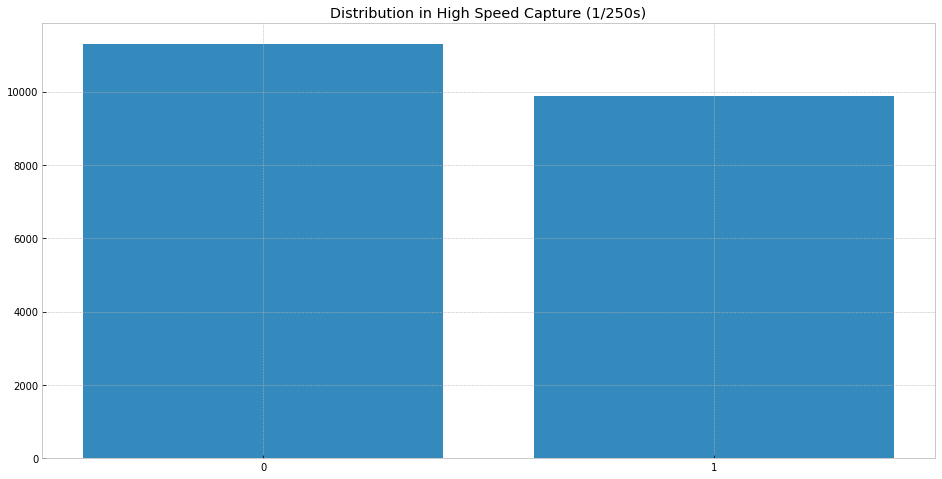

In [54]:
## Assign 1/250 as threshold
high_speed_labels = np.where(dataset['exif_exposure_time']<='1/250','1','0')

plt.title("Distribution in High Speed Capture (1/250s)")
plt.bar(dict(Counter(high_speed_labels)).keys(), dict(Counter(high_speed_labels)).values())
plt.savefig('exposure.png')

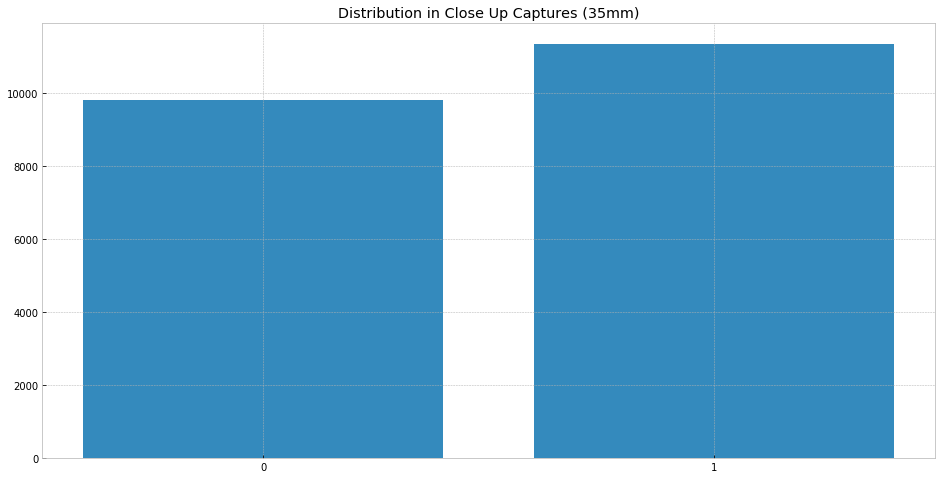

In [55]:
## Assign 35mm as a threshold
close_up_labels = np.where(dataset['exif_focal_length']>35,'1','0')

plt.title("Distribution in Close Up Captures (35mm)")
plt.bar(dict(Counter(close_up_labels)).keys(), dict(Counter(close_up_labels)).values())
plt.savefig('focal.png')

In [27]:
dataset.loc[:,'iso_noise_label'] = pd.Series(iso_noise_labels, index=dataset.index)
dataset.loc[:,'bokeh_label'] = pd.Series(bokeh_labels, index=dataset.index)
dataset.loc[:,'high_speed_label'] = pd.Series(high_speed_labels, index=dataset.index)
dataset.loc[:,'close_up_label'] = pd.Series(close_up_labels, index=dataset.index)

/home/steve/.virtualenvs/tf_dev/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/steve/.virtualenvs/tf_dev/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
dataset

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,iso_noise_label,bokeh_label,high_speed_label,close_up_label
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1.0,0,0,0,0
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1.0,0,0,0,1
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1.0,0,0,1,0
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1.0,1,1,0,1
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24992,jH7EBc1GvCg,DJI,FC220,100.0,4.7,2.2,1/640,1.0,0,1,0,0
24993,Vl26HXL7_ZM,NIKON CORPORATION,NIKON D7200,1400.0,105.0,4.0,1/250,0.0,1,0,1,1
24996,lPqq7oriWnw,Canon,Canon EOS R,640.0,105.0,4.0,1/100,1.0,0,0,1,1
24997,8M3ekCRYwoA,Canon,Canon EOS Rebel SL2,100.0,75.0,4.0,1/250,0.0,0,0,1,1


In [31]:
# Hold the 10% of the data for validation
valid_length = int(dataset.shape[0] * 10/100)
limit = dataset.shape[0] - valid_length
train = dataset[0:limit]
valid = dataset[limit:]

In [29]:
# test set = full dataset - cleaned dataset
test = photos.drop(index=dataset.index)

In [32]:
print(train.shape)
print(valid.shape)
print(test.shape)

(19052, 12)
(2116, 12)
(3832, 8)


## Exif analysis in dataset (train-validation)

In [32]:
%matplotlib inline

#### ISO values

In [33]:
len(dataset['exif_iso'].unique())

177

#### Aperture values

In [34]:
len(dataset['exif_aperture_value'].unique())

88

#### Shutter speed values

In [35]:
len(photos['exif_exposure_time'].unique())

601

#### Focal Length values

In [36]:
len(photos['exif_focal_length'].unique())

609

In [46]:
def exif_analysis(photos,filename):
    plt_style('w')
    fig = plt.figure(figsize=(20,25))

    gs = gridspec.GridSpec(4, 1,figure=fig, hspace=.4)

    plt.subplot(gs[0, 0])
    pd.value_counts(photos['exif_focal_length'])[:40].plot.bar()
    plt.title('Focal length values', fontsize=12)

    plt.subplot(gs[1, 0])
    pd.value_counts(photos['exif_aperture_value'])[:10].plot.bar()
    plt.title('Aperture values', fontsize=12)

    plt.subplot(gs[2, 0])
    pd.value_counts(photos['exif_exposure_time'])[:40].plot.bar()
    plt.title('Exposure values', fontsize=12)

    plt.subplot(gs[3, 0])
    pd.value_counts(photos['exif_iso'])[:40].plot.bar()
    plt.title('ISO values', fontsize=12)
    plt.savefig(filename+'.png')

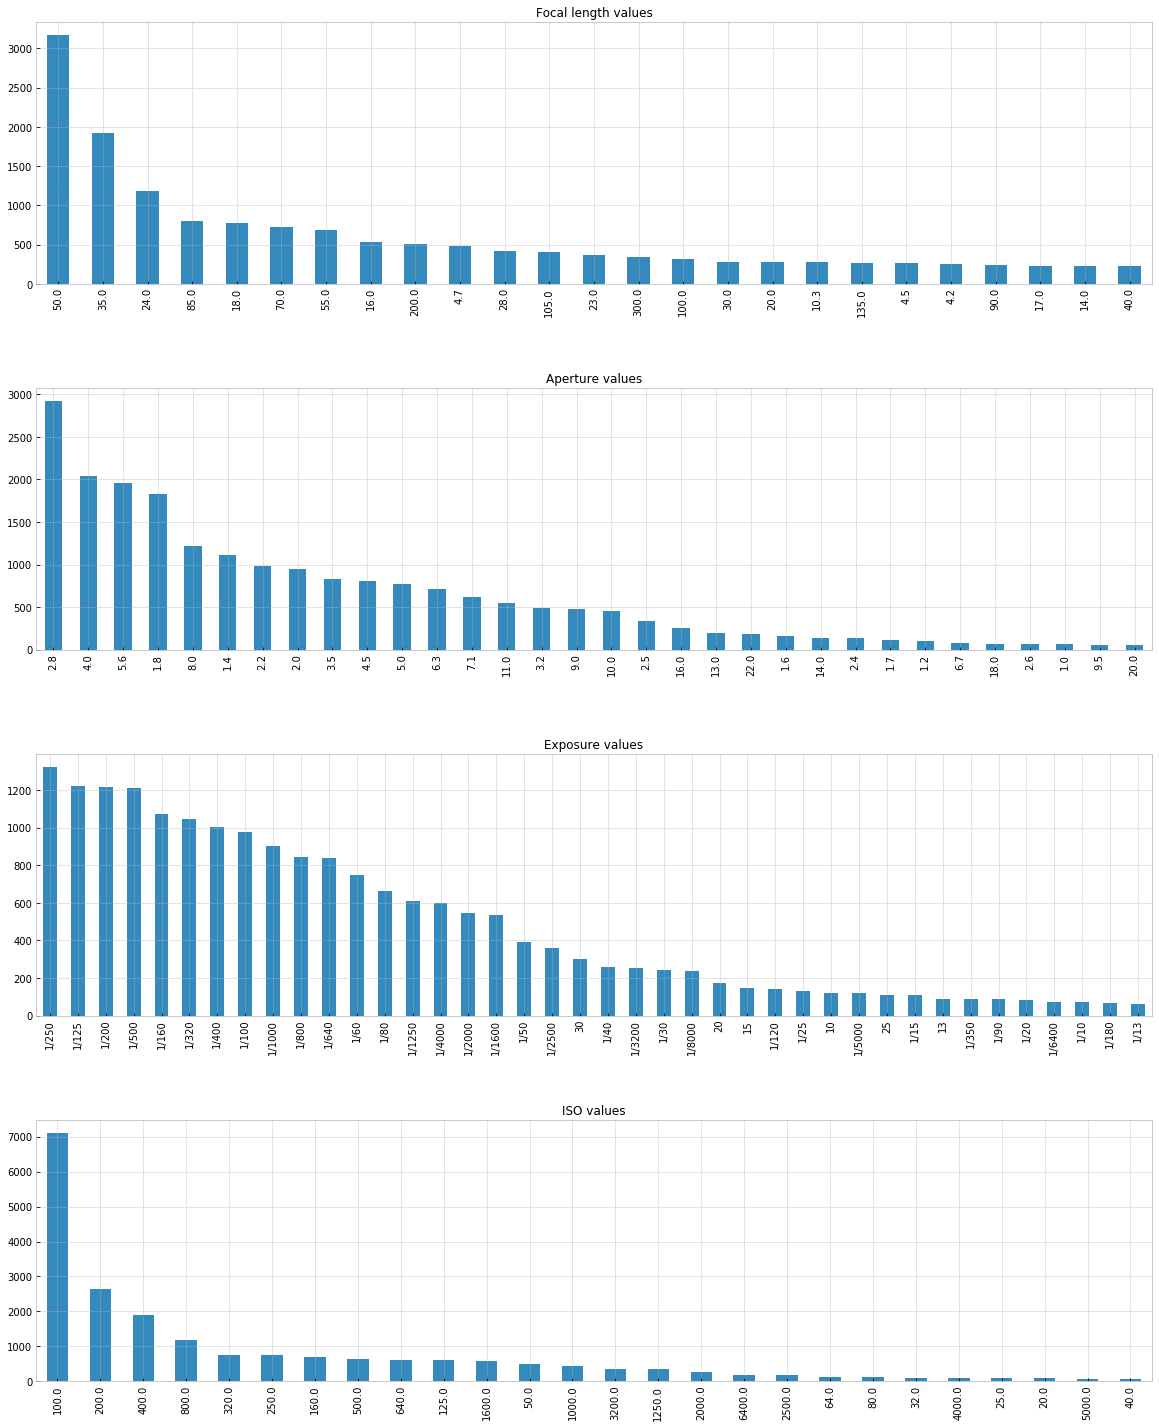

In [40]:
exif_analysis(dataset,'dataset')

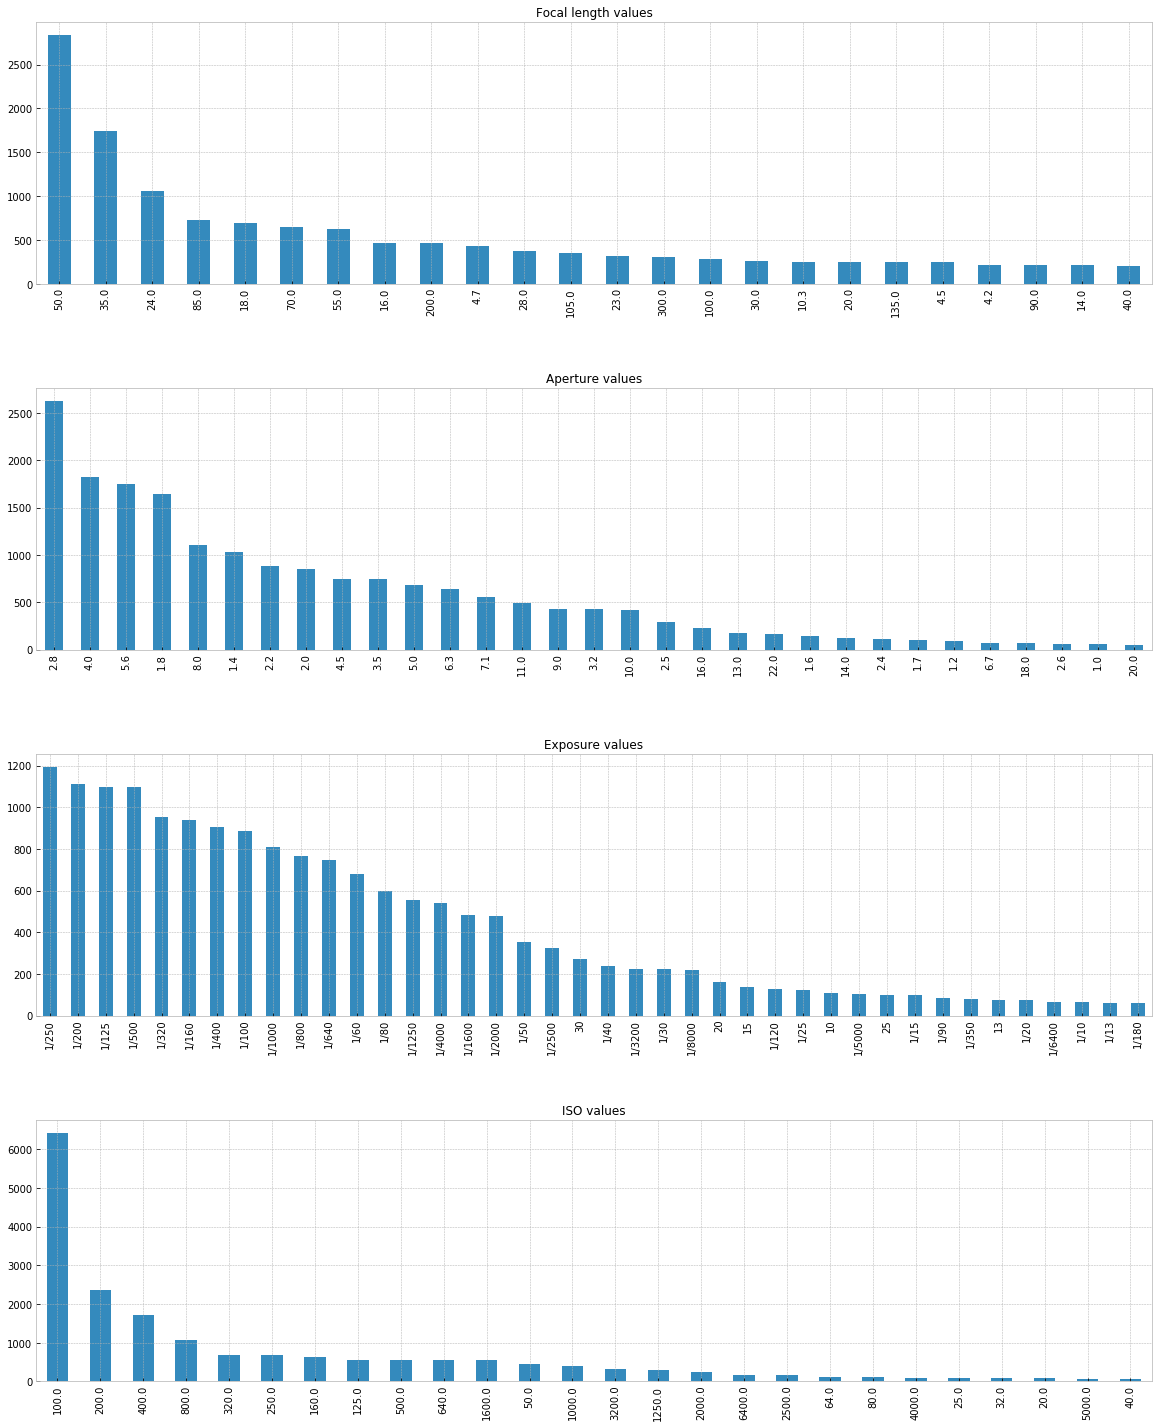

In [41]:
exif_analysis(train,'train')

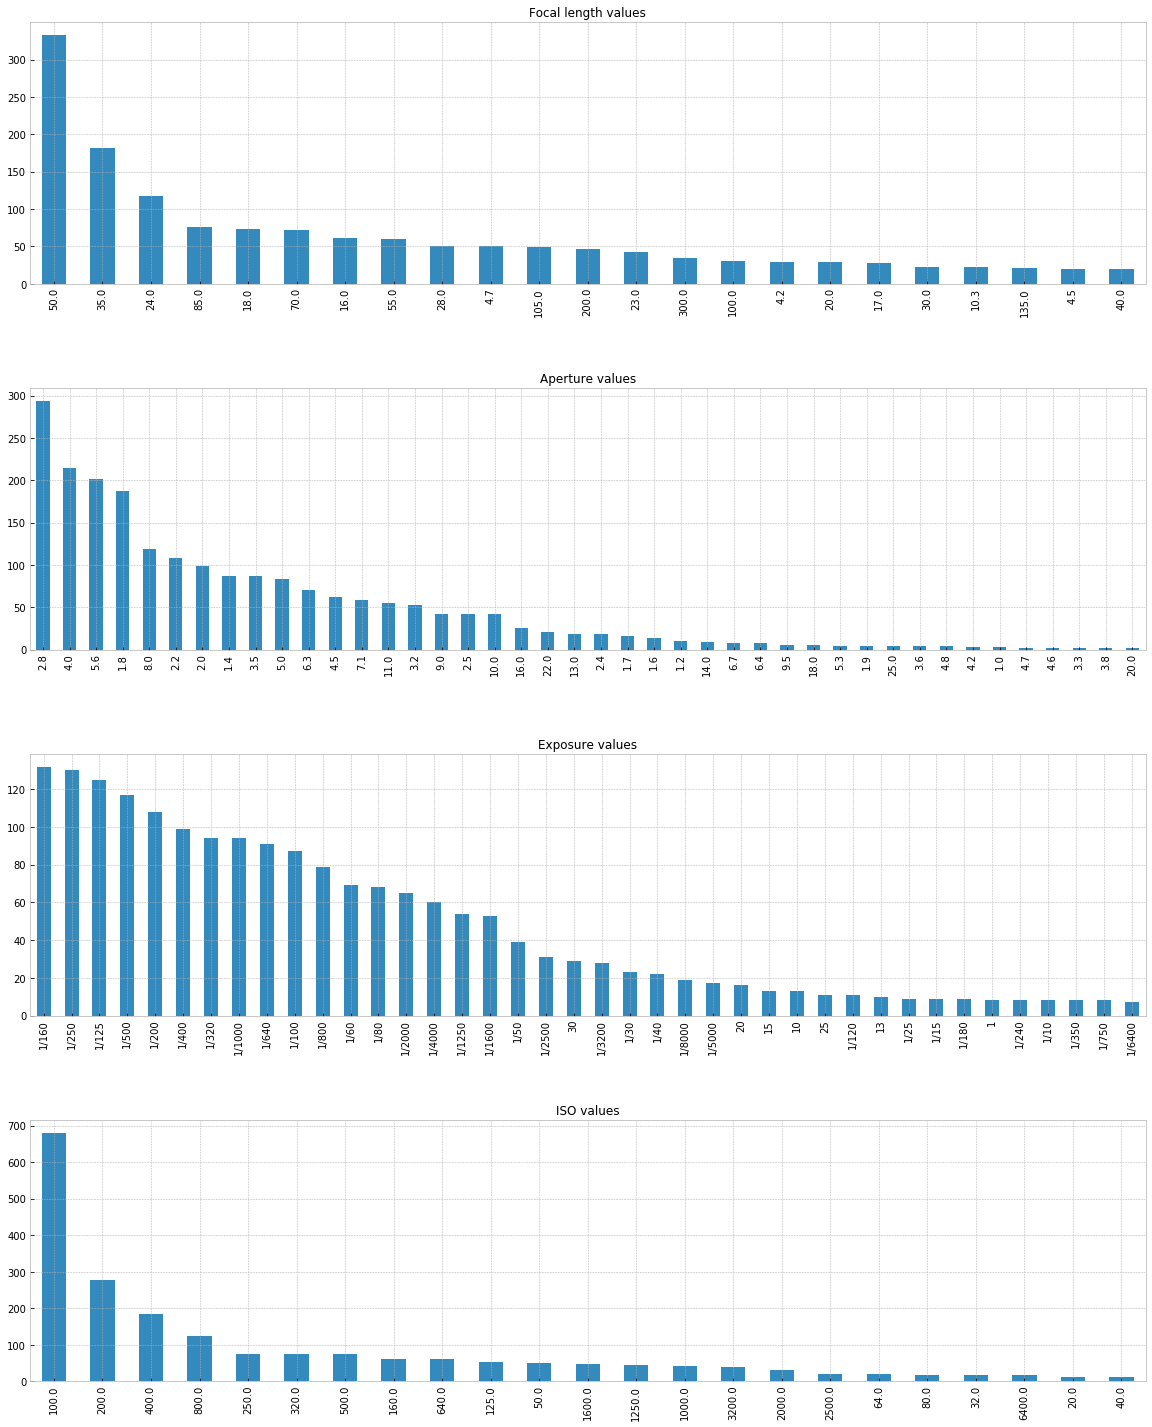

In [42]:
exif_analysis(valid,'valid')

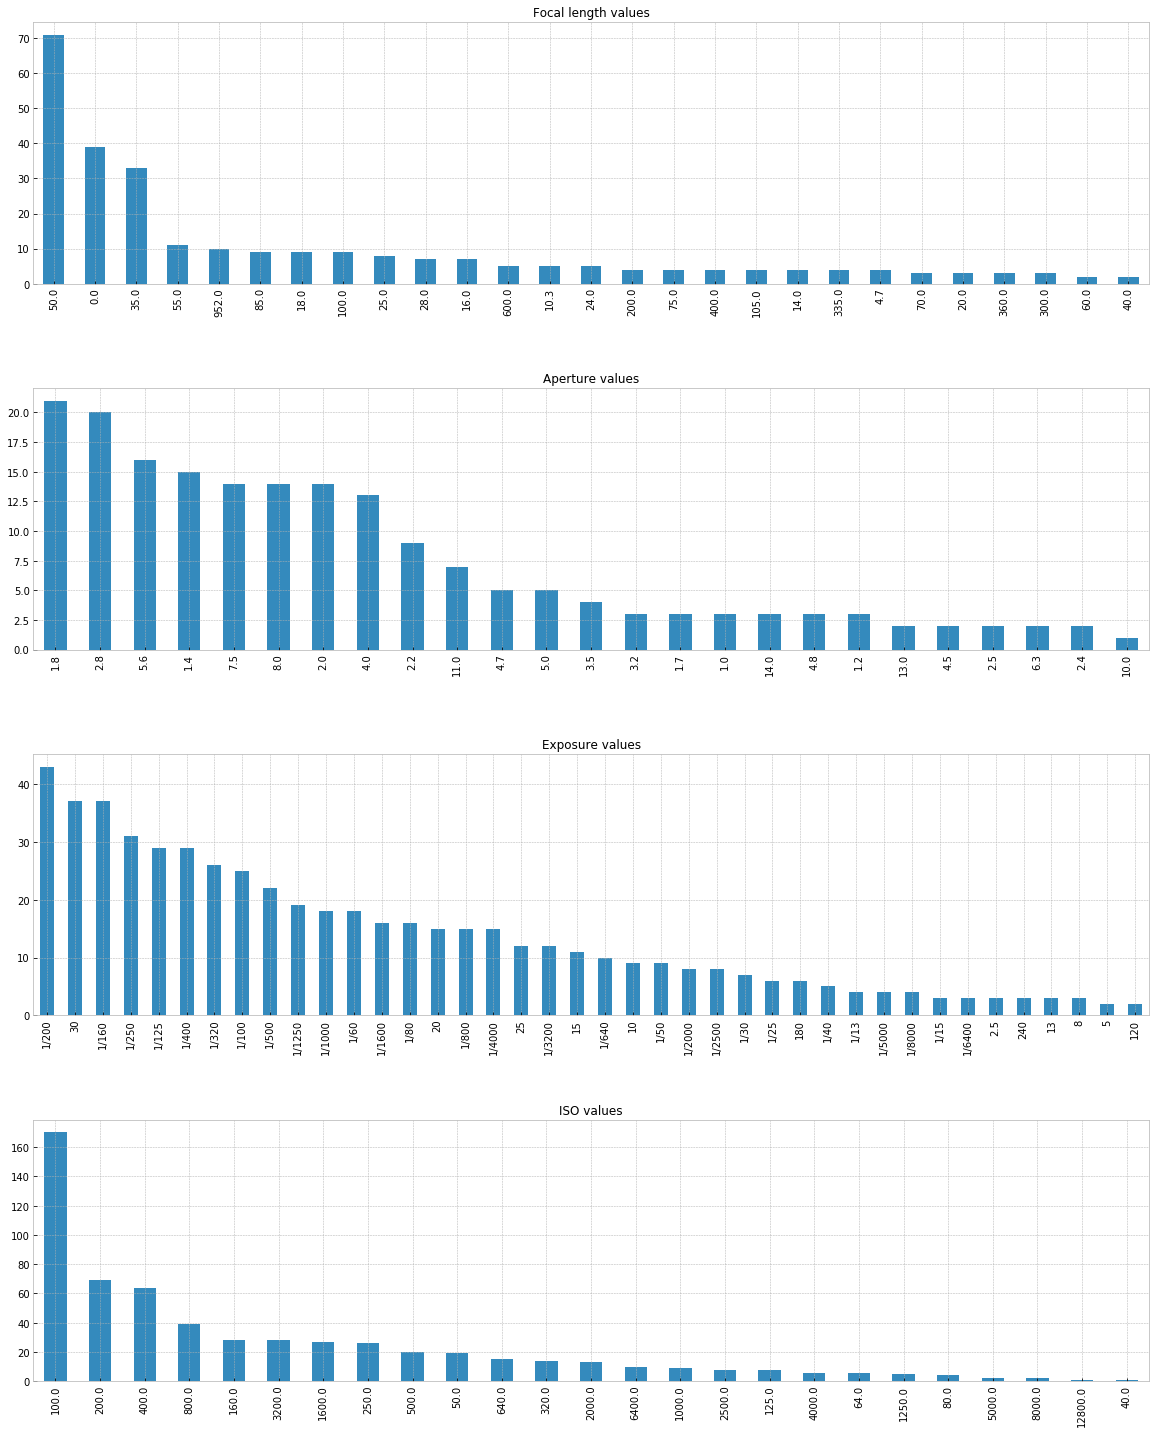

In [47]:
exif_analysis(test,'test')

In [56]:
train.to_csv('../../dataset/train.csv')
valid.to_csv('../../dataset/valid.csv')
test.to_csv('../../dataset/test.csv')

### Misc section

In [52]:
photos['exif_camera_model']

0                   SLT-A77V
1            Canon EOS 1100D
2        Canon EOS REBEL T3i
3         Canon EOS REBEL T3
4                NIKON D3200
                ...         
24992                  FC220
24993            NIKON D7200
24996            Canon EOS R
24997    Canon EOS Rebel SL2
24998              ILCE-6000
Name: exif_camera_model, Length: 21203, dtype: object

In [10]:
u_cameras = photos['exif_camera_model'].unique()
cameras = photos['exif_camera_model'].to_string()
print("Unique cameras %d" % len(u_cameras))

Unique cameras 913


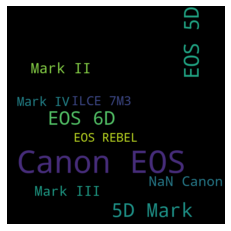

In [76]:
camera_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(cameras)
plt.axis("off")
plt.imshow(camera_cloud, interpolation='bilinear')

### Keywords

In [14]:
datasets['keywords'].columns

Index(['photo_id', 'keyword', 'ai_service_1_confidence',
       'ai_service_2_confidence', 'suggested_by_user'],
      dtype='object')

In [15]:
u_keywords = datasets['keywords']['keyword'].unique()
keywords = datasets['keywords']['keyword'].to_string()
print("Unique keywords %d" % len(u_keywords))

Unique keywords 27613


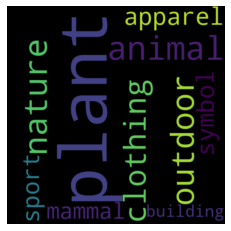

In [77]:
keyword_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(keywords)
plt.axis("off")
plt.imshow(keyword_cloud, interpolation='bilinear')

## Conversions

In [17]:
u_conversions_keys = datasets['conversions']['keyword'].unique()
print(len(u_conversions_keys))

223508


In [18]:
converstions_keys = datasets['conversions']['keyword'].to_string()
convertion_key_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(converstions_keys)


NameError: name 'plt' is not defined

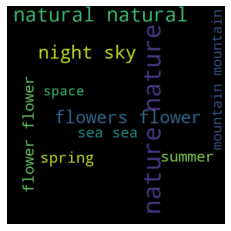

In [20]:
plt.axis("off")
plt.imshow(convertion_key_cloud, interpolation='bilinear')

## Collections

In [21]:
u_collections_titles = datasets['collections']['collection_title'].unique()
print(len(u_collections_titles))

178154


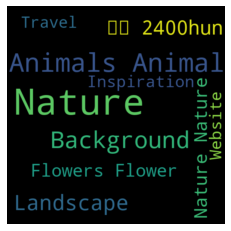

In [22]:
collections_titles = datasets['collections']['collection_title'].to_string()
collections_titles_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(collections_titles)
plt.axis("off")
plt.imshow(collections_titles_cloud, interpolation='bilinear')

## Locate photos

In [53]:
datasets['photos']['photo_image_url'].loc[datasets['photos']['photo_id'] == 'sEDzxW4NhL4']

18136    https://images.unsplash.com/photo-158601949619...
Name: photo_image_url, dtype: object

In [50]:
datasets['photos'].loc[datasets['photos']['photo_id'] == '8ZgJyLGbC7Y']

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photographer_username,photographer_first_name,photographer_last_name,exif_camera_make,exif_camera_model,exif_iso,exif_aperture_value,exif_focal_length,exif_exposure_time,photo_location_name,photo_location_latitude,photo_location_longitude,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence
0,8ZgJyLGbC7Y,https://unsplash.com/photos/8ZgJyLGbC7Y,https://images.unsplash.com/40/KJyFV5SZSweiYGh...,2014-07-05 13:43:36,t,martindorsch,Martin,Dörsch,SONY,SLT-A77V,100.0,8.0,28.0,1/640,"Weigersdorf 29, 4551 Weigersdorf, Austria, Wei...",48.043625,14.066983,Austria,Weigersdorf,8278047,52989,narrow road in between soil grounds,NaN,NaN,NaN,NaN


In [28]:
datasets['conversions'].loc[datasets['conversions']['photo_id'] == '0b4sfNTqBLU']

,converted_at,conversion_type,keyword,photo_id,anonymous_user_id,conversion_country
8905,2020-02-29 18:49:47,download,marijuana,0b4sfNTqBLU,2689c4a3-6067-49f1-8bf7-09473c8bdb77,CA
59639,2020-03-03 19:07:10,download,cannabis,0b4sfNTqBLU,9cd972ff-edfa-42c3-9a9f-32f453b1639e,US
156240,2020-03-09 21:46:01,download,marijuana,0b4sfNTqBLU,1cdd8d2d-1473-4d8e-b3d1-ccd756f28ac0,US
174619,2020-03-16 15:06:48,download,marijuana and tinctures,0b4sfNTqBLU,fbd50bb1-3ccd-46d5-b82c-c8ec16e45ea8,US
187922,2020-03-12 20:19:13,download,cannabis,0b4sfNTqBLU,90b05b6a-193a-42de-b1d2-8fd63f04fd55,CA
...,...,...,...,...,...,...
3812100,2020-06-26 20:43:50.548,download,eating food,0b4sfNTqBLU,d9d4bf8b-a191-4173-9a7c-267652506775,ES
3826644,2020-06-11 19:39:05.418,download,cannabis,0b4sfNTqBLU,d1d4d773-1d04-4ea6-a769-3e3eeaba61d2,US
3835821,2020-06-28 05:41:50.859,download,eating,0b4sfNTqBLU,0bd3aea8-96c7-4f88-b425-01d6f11a399a,US
3969802,2020-06-19 00:57:03.419,download,weed,0b4sfNTqBLU,4fa35bf0-403e-435c-be55-2d6142786ae8,TW


In [29]:
datasets['keywords'].loc[datasets['keywords']['photo_id'] == '0b4sfNTqBLU']

,photo_id,keyword,ai_service_1_confidence,ai_service_2_confidence,suggested_by_user
2619868,0b4sfNTqBLU,closet,24.967670,NaN,f
2619869,0b4sfNTqBLU,fashion,23.274206,NaN,f
2619870,0b4sfNTqBLU,military,37.976463,NaN,f
2619871,0b4sfNTqBLU,accessory,92.576630,NaN,f
2619872,0b4sfNTqBLU,candy,24.741817,NaN,f
...,...,...,...,...,...
2620003,0b4sfNTqBLU,teeth,16.160416,NaN,f
2620004,0b4sfNTqBLU,burger,38.315941,NaN,f
2620005,0b4sfNTqBLU,confectionery,42.486397,NaN,f
2620006,0b4sfNTqBLU,neck,23.576967,NaN,f


In [30]:
datasets['collections'].loc[datasets['collections']['photo_id'] == '0b4sfNTqBLU']

,photo_id,collection_id,collection_title,photo_collected_at
41721,0b4sfNTqBLU,9314334,CALIPHORIA,2020-01-02 04:12:49
41722,0b4sfNTqBLU,3558778,Women,2018-11-22 09:09:46
41723,0b4sfNTqBLU,1367542,Pessoas,2017-11-08 09:36:27
41724,0b4sfNTqBLU,4488418,Cannabis + Lifestyle,2019-03-19 20:55:02
41725,0b4sfNTqBLU,8568557,Ver Smaerts,2019-09-04 17:46:16
...,...,...,...,...
41742,0b4sfNTqBLU,3659376,bud,2018-12-12 01:39:59
41743,0b4sfNTqBLU,6137119,feeding,2019-07-01 12:54:18
41744,0b4sfNTqBLU,3358754,People,2018-10-15 01:18:02
41745,0b4sfNTqBLU,9527448,BTS Stories,2020-02-11 15:37:32


In [4]:
datasets['photos']['photo_id'][21000]

'K03EeiFqtps'

## Save URLs

In [17]:
save_path = '../data/'

In [31]:
url_list = datasets['photos']['photo_image_url'].values

In [32]:
url_list

array(['https://images.unsplash.com/40/KJyFV5SZSweiYGhMhrqC_MD4817.jpg',
       'https://images.unsplash.com/31/xDtuvK3GRJGUSUHgj0ew_IMG_3860.jpg',
       'https://images.unsplash.com/photo-1415353115981-9bb4c22bafed',
       ...,
       'https://images.unsplash.com/photo-1591568164230-62371697e356',
       'https://images.unsplash.com/photo-1591229677225-2e8fc742b80c',
       'https://images.unsplash.com/photo-1591391974719-b03b035e8e5b'],
      dtype=object)

In [34]:
np.savetxt(save_path+'urls.txt', url_list, fmt='%15s')